# Deskriptive Statistik

## Imports

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels import robust
import matplotlib.pyplot as plt

## Datengrundlage

In [118]:
data = pd.DataFrame.from_dict({"Bayern":[29296,13140],"NRW":[37937,17926],"Niedersachsen":[15469,8003],"Baden-Württemberg":[24548,11103],"Hessen":[14243,6293],"Sachsen":[6869,4057],"Brandenburg":[4211,2531],"Rheinland-Pfalz":[10604,4098],"Sachsen-Anhalt":[3762,2181],"Schleswig-Holstein":[5927,2911],"Thüringen":[3770,2120],"Mecklenburg-Vorpommern":[3338,1611],"Berlin":[9815,3664],"Saarland":[2782,984],"Hamburg":[4517,1852],"Bremen":[1583,680]},orient="index",columns=["Restaurants","Einwohner in T"])
data["Restaurants pro T Einwohner"] = data["Restaurants"]/data["Einwohner in T"]
data.sort_values("Restaurants")

,Restaurants,Einwohner in T,Restaurants pro T Einwohner
Bremen,1583,680,2.327941
Saarland,2782,984,2.827236
Mecklenburg-Vorpommern,3338,1611,2.072005
Sachsen-Anhalt,3762,2181,1.724897
Thüringen,3770,2120,1.778302
Brandenburg,4211,2531,1.663769
Hamburg,4517,1852,2.438985
Schleswig-Holstein,5927,2911,2.036070
Sachsen,6869,4057,1.693123
Berlin,9815,3664,2.678766


## Arithmetisches Mittel

In [121]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Das Arithmetisches Mittel der {} liegt bei {:.2f}".format(column,np.mean(data[column])))

Das Arithmetisches Mittel der Restaurants liegt bei 11166.94
Das Arithmetisches Mittel der Einwohner in T liegt bei 5197.12


## Getrimmtes Mittel

In [122]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Das getrimmte Mittel der {} liegt bei {:.2f}".format(column,stats.trim_mean(data[column],0.1)))

Das getrimmte Mittel der Restaurants liegt bei 9939.36
Das getrimmte Mittel der Einwohner in T liegt bei 4610.57


## Median

In [125]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Der Median der {} liegt bei {:.1f}".format(column,np.median(data[column])))

Der Median der Restaurants liegt bei 6398.0
Der Median der Einwohner in T liegt bei 3287.5


## Spannweite

Die Spannweit der Restaurants liegt bei 36354
Die Spannweit der Einwohner in T liegt bei 17246


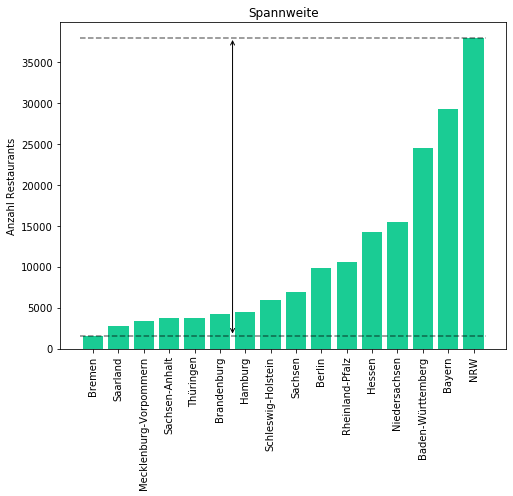

In [126]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Die Spannweit der {} liegt bei {:.0f}".format(column,data[column].max()-data[column].min()))
    
sorted_data = data.sort_values("Restaurants")

plt.figure(figsize=(8,6))
plt.bar(sorted_data.index,sorted_data["Restaurants"],color="#1ACC94")
plt.xticks(rotation=90)
plt.title("Spannweite")
plt.ylabel("Anzahl Restaurants")
plt.hlines(sorted_data["Restaurants"].max(),-0.5,15.5,ls="--",alpha=0.5)
plt.hlines(sorted_data["Restaurants"].min(),-0.5,15.5,ls="--",alpha=0.5)
plt.annotate(s='', xy=(5.5,sorted_data["Restaurants"].min()), xytext=(5.5,sorted_data["Restaurants"].max()), arrowprops=dict(arrowstyle='<->'))
plt.show()

## Mittlere absolute Abweichung (MAD)

In [128]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Die MAD der {} liegt bei {:.2f}".format(column,data[column].mad()))

Die MAD der Restaurants liegt bei 8207.29
Die MAD der Einwohner in T liegt bei 3809.92


## Standardabweichung

In [129]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Die Standardabweichung der {} liegt bei {:.2f}".format(column,np.std(data[column])))

Die Standardabweichung der Restaurants liegt bei 10386.29
Die Standardabweichung der Einwohner in T liegt bei 4789.51


## Perzentil

80% der Bundesländer haben 15469 oder weniger Restaurants
80% der Bundesländer haben 8003 oder weniger Einwohner in T


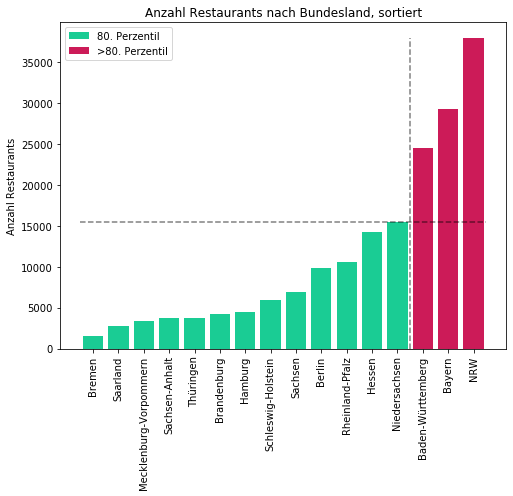

In [130]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("80% der Bundesländer haben {:.0f} oder weniger {}".format(np.percentile(data[column],80),column))
    
plt.figure(figsize=(8,6))
plt.bar(sorted_data.loc[sorted_data["Restaurants"] <= 15469].index,sorted_data.loc[sorted_data["Restaurants"] <= 15469]["Restaurants"],label="80. Perzentil",color="#1ACC94")
plt.bar(sorted_data.loc[sorted_data["Restaurants"] > 15469].index,sorted_data.loc[sorted_data["Restaurants"] > 15469]["Restaurants"],label=">80. Perzentil",color="#CC1B58")
plt.xticks(rotation=90)
plt.title("Anzahl Restaurants nach Bundesland, sortiert")
plt.ylabel("Anzahl Restaurants")
plt.vlines(12.5,0,38000,ls="--",alpha=0.5)
plt.hlines(15469,-0.5,15.5,ls="--",alpha=0.5)
plt.legend()
plt.show()

## Interquartilsabstand

Der Interquartilsabstand der Restaurants liegt bei 10781.50
Der Interquartilsabstand der Einwohner in T liegt bei 4667.50


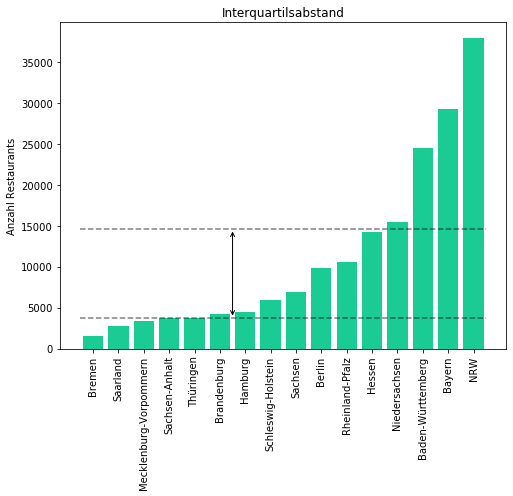

In [131]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Der Interquartilsabstand der {} liegt bei {:.2f}".format(column,stats.iqr(data[column])))
    
plt.figure(figsize=(8,6))
plt.bar(sorted_data.index,sorted_data["Restaurants"],color="#1ACC94")
plt.xticks(rotation=90)
plt.title("Interquartilsabstand")
plt.ylabel("Anzahl Restaurants")
plt.hlines(np.percentile(sorted_data["Restaurants"],75),-0.5,15.5,ls="--",alpha=0.5)
plt.hlines(np.percentile(sorted_data["Restaurants"],25),-0.5,15.5,ls="--",alpha=0.5)
plt.annotate(s='', xy=(5.5,np.percentile(sorted_data["Restaurants"],25)), xytext=(5.5,np.percentile(sorted_data["Restaurants"],75)), arrowprops=dict(arrowstyle='<->'))
plt.show()